In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('F:/ml-data/yidong/1.csv')

### 数据描述

In [3]:
data.head()

,data_mon,row_id,reg_gender,reg_age,day_county_name,night_county_name,arpu,tmnl_model,tmn_dur,user_online,user_class,dou,app_top1,app_top2,app_top3
0,1,2387162,0,7.0,石城县,石城县,0,NaN,2.0,5,2.0,0,NaN,NaN,NaN
1,1,2387163,0,6.0,昌东区,昌东区,2,A83,3.0,5,2.0,1,xiaoniangao,腾讯视频,腾讯网
2,1,2387164,1,6.0,信丰县,信丰县,0,NaN,0.0,5,2.0,0,NaN,NaN,NaN
3,1,2387165,0,7.0,上犹县,上犹县,1,E988,0.0,5,3.0,0,NaN,NaN,NaN
4,1,2387166,0,6.0,青云谱区,青云谱区,2,V1813BA,0.0,5,3.0,2,快手,微信,一点资讯OPPO版


In [4]:
data.describe()

,data_mon,row_id,reg_gender,reg_age,arpu,tmn_dur,user_online,user_class,dou
count,8407817.0,8.407817e+06,8.407817e+06,8.396264e+06,8.407817e+06,8.365661e+06,8.407817e+06,7.789079e+06,8.407817e+06
mean,1.0,4.203909e+06,4.364988e-01,5.673827e+00,9.680745e-01,1.770104e+00,3.447451e+00,1.777096e+00,1.807259e+00
std,0.0,2.427128e+06,4.961514e-01,8.854150e-01,1.091556e+00,1.468861e+00,1.539644e+00,1.507083e+00,1.789335e+00
min,1.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.0,2.101955e+06,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.0,4.203909e+06,0.000000e+00,6.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00
75%,1.0,6.305863e+06,1.000000e+00,6.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00
max,1.0,8.407817e+06,2.000000e+00,7.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407817 entries, 0 to 8407816
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   data_mon           int64  
 1   row_id             int64  
 2   reg_gender         int64  
 3   reg_age            float64
 4   day_county_name    object 
 5   night_county_name  object 
 6   arpu               int64  
 7   tmnl_model         object 
 8   tmn_dur            float64
 9   user_online        int64  
 10  user_class         float64
 11  dou                int64  
 12  app_top1           object 
 13  app_top2           object 
 14  app_top3           object 
dtypes: float64(3), int64(6), object(6)
memory usage: 962.2+ MB


### 数据预处理

In [6]:
new_data = data.dropna()
new_data = new_data.iloc[:200000]

In [7]:
new_data.describe()

,data_mon,row_id,reg_gender,reg_age,arpu,tmn_dur,user_online,user_class,dou
count,200000.0,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1.0,2.529712e+06,0.453850,5.732700,1.382710,2.107625,4.994980,2.816515,2.483925
std,0.0,8.298598e+04,0.497967,0.669293,1.123926,1.431828,0.078898,0.839114,1.590586
min,1.0,2.387163e+06,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,1.0,2.458104e+06,0.000000,5.000000,1.000000,1.000000,5.000000,2.000000,1.000000
50%,1.0,2.528766e+06,0.000000,6.000000,1.000000,2.000000,5.000000,3.000000,2.000000
75%,1.0,2.600763e+06,1.000000,6.000000,2.000000,3.000000,5.000000,3.000000,4.000000
max,1.0,2.675412e+06,2.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
def get_label(data, column_name):
    new_data = data.groupby(column_name, sort = True, as_index = False).count()
    label_idx = new_data.index
    label_list = new_data[column_name].to_list()
    
    return label_list

In [10]:
area_list = get_label(new_data, 'night_county_name')


In [11]:
def get_app_label(data):
    new_data = data.groupby('app_top1', sort = True, as_index = False).count()
    app_list1 = new_data['app_top1'].to_list()
    
    new_data = data.groupby('app_top2', sort = True, as_index = False).count()
    app_list2 = new_data['app_top2'].to_list()
    
    new_data = data.groupby('app_top3', sort = True, as_index = False).count()
    app_list3 = new_data['app_top3'].to_list()
    all_list = list(set(app_list1).union(app_list2, app_list3))
    
    return all_list

In [12]:
app_list = get_app_label(new_data)
len(app_list)

1363

In [13]:
temp = new_data.copy()
temp.head()

,data_mon,row_id,reg_gender,reg_age,day_county_name,night_county_name,arpu,tmnl_model,tmn_dur,user_online,user_class,dou,app_top1,app_top2,app_top3
1,1,2387163,0,6.0,昌东区,昌东区,2,A83,3.0,5,2.0,1,xiaoniangao,腾讯视频,腾讯网
4,1,2387166,0,6.0,青云谱区,青云谱区,2,V1813BA,0.0,5,3.0,2,快手,微信,一点资讯OPPO版
8,1,2387170,0,5.0,南康县,南康县,3,POT-AL00A,1.0,5,3.0,4,抖音短视频,腾讯网,腾讯体育
9,1,2387171,0,7.0,修水县,修水县,1,M654,3.0,5,3.0,0,BitTorrent,视频文件识别,微信
11,1,2387173,0,7.0,东湖区,东湖区,2,RIO-UL00,0.0,5,3.0,1,微信,腾讯视频,腾讯网


In [14]:
new_data = new_data.reset_index()
#new_data.drop([], axis = 1)
new_data.head()

,index,data_mon,row_id,reg_gender,reg_age,day_county_name,night_county_name,arpu,tmnl_model,tmn_dur,user_online,user_class,dou,app_top1,app_top2,app_top3
0,1,1,2387163,0,6.0,昌东区,昌东区,2,A83,3.0,5,2.0,1,xiaoniangao,腾讯视频,腾讯网
1,4,1,2387166,0,6.0,青云谱区,青云谱区,2,V1813BA,0.0,5,3.0,2,快手,微信,一点资讯OPPO版
2,8,1,2387170,0,5.0,南康县,南康县,3,POT-AL00A,1.0,5,3.0,4,抖音短视频,腾讯网,腾讯体育
3,9,1,2387171,0,7.0,修水县,修水县,1,M654,3.0,5,3.0,0,BitTorrent,视频文件识别,微信
4,11,1,2387173,0,7.0,东湖区,东湖区,2,RIO-UL00,0.0,5,3.0,1,微信,腾讯视频,腾讯网


In [16]:


area_list = get_label(new_data, 'day_county_name')
app_list = get_app_label(new_data)

day_area = []
new_app1 = []
new_app2 = []
new_app3 = []

for idx, area, app1, app2, app3 in zip(new_data.index, new_data['day_county_name'], new_data['app_top1'], new_data['app_top2'], new_data['app_top3']):
    day_area.append(area_list.index(area))
    new_app1.append(app_list.index(app1))
    new_app2.append(app_list.index(app2))
    new_app3.append(app_list.index(app3))
    
    
print('area len: %d   app1 len: %d  app2 len: %d app3 len: %d' %(len(day_area), len(new_app1), len(new_app2), len(new_app3)))
    
temp_dict = {'day_county_code': day_area, 'app_top1_code':new_app1, 'app_top2_code': new_app2, 'app_top3_code': new_app3}

pd_temp = pd.DataFrame(temp_dict)
#pd_temp.head()
temp = pd.concat([new_data, pd.DataFrame(temp_dict)], axis = 1, join = 'inner')
temp.head()

area len: 200000   app1 len: 200000  app2 len: 200000 app3 len: 200000


,index,data_mon,row_id,reg_gender,reg_age,day_county_name,night_county_name,arpu,tmnl_model,tmn_dur,user_online,user_class,dou,app_top1,app_top2,app_top3,day_county_code,app_top1_code,app_top2_code,app_top3_code
0,1,1,2387163,0,6.0,昌东区,昌东区,2,A83,3.0,5,2.0,1,xiaoniangao,腾讯视频,腾讯网,59,5,980,927
1,4,1,2387166,0,6.0,青云谱区,青云谱区,2,V1813BA,0.0,5,3.0,2,快手,微信,一点资讯OPPO版,98,316,345,1210
2,8,1,2387170,0,5.0,南康县,南康县,3,POT-AL00A,1.0,5,3.0,4,抖音短视频,腾讯网,腾讯体育,29,589,927,147
3,9,1,2387171,0,7.0,修水县,修水县,1,M654,3.0,5,3.0,0,BitTorrent,视频文件识别,微信,21,307,1186,345
4,11,1,2387173,0,7.0,东湖区,东湖区,2,RIO-UL00,0.0,5,3.0,1,微信,腾讯视频,腾讯网,8,345,980,927


In [17]:
new_data = temp.drop(['index', 'data_mon','row_id', 'day_county_name', 
                          'night_county_name', 'tmnl_model', 'app_top1', 'app_top2', 'app_top3'], axis = 1)

In [18]:
new_data.head(30)

,reg_gender,reg_age,arpu,tmn_dur,user_online,user_class,dou,day_county_code,app_top1_code,app_top2_code,app_top3_code
0,0,6.0,2,3.0,5,2.0,1,59,5,980,927
1,0,6.0,2,0.0,5,3.0,2,98,316,345,1210
2,0,5.0,3,1.0,5,3.0,4,29,589,927,147
3,0,7.0,1,3.0,5,3.0,0,21,307,1186,345
4,0,7.0,2,0.0,5,3.0,1,8,345,980,927
5,0,6.0,2,0.0,5,2.0,4,79,882,268,630
6,1,5.0,1,4.0,5,3.0,2,39,345,947,927
7,0,5.0,1,0.0,5,3.0,0,42,345,927,1227
8,0,5.0,1,2.0,5,3.0,4,42,1198,320,511
9,1,5.0,2,4.0,5,4.0,5,100,589,253,728


### 数据分析

In [19]:
import seaborn as sns
import plotly.express as px

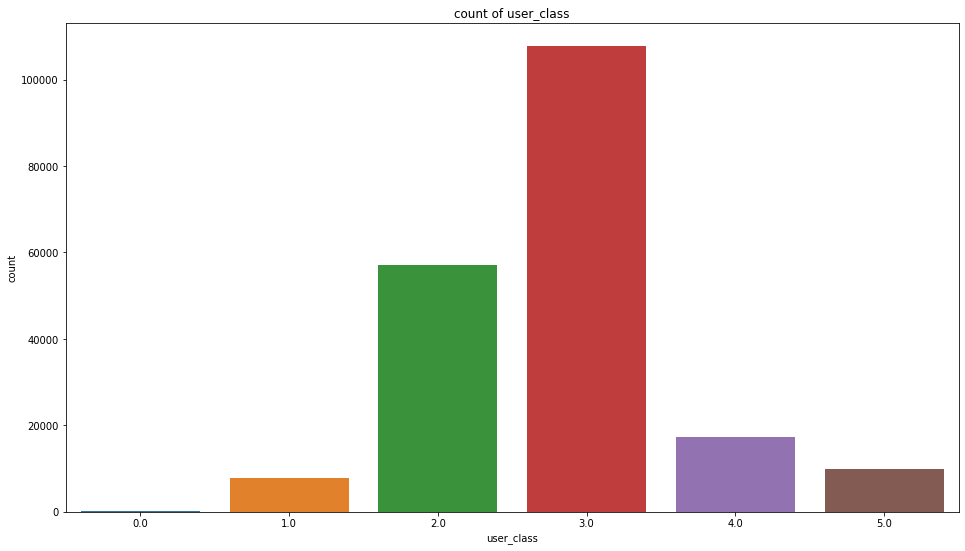

In [20]:
plt.figure(figsize=(16, 9))
sns.countplot(new_data['user_class'])
plt.title('count of user_class')
plt.show()

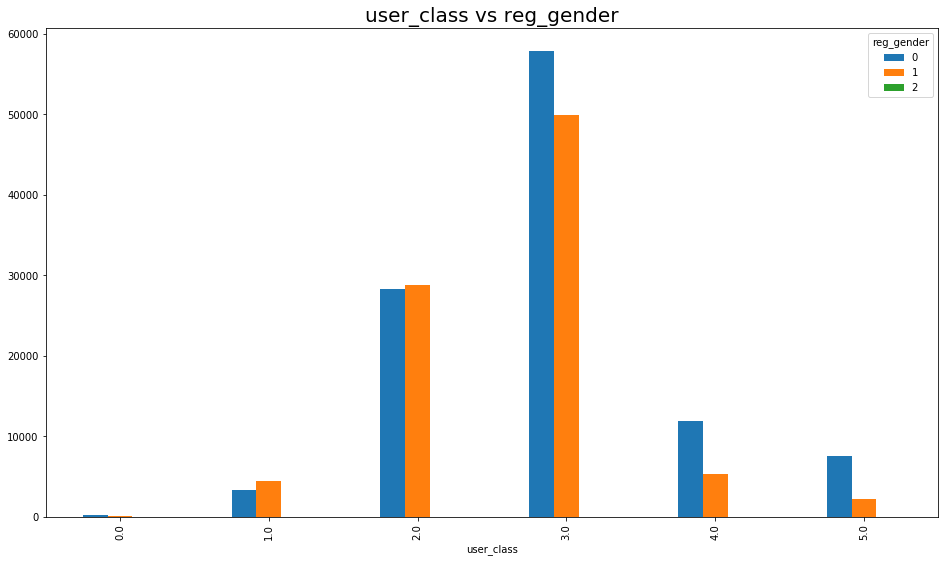

In [21]:
plt.rcParams['figure.figsize'] = (16, 9)
x = pd.crosstab(new_data['user_class'], new_data['reg_gender'])
x.plot(kind = 'bar', stacked = False)
plt.title('user_class vs reg_gender', fontweight = 30, fontsize = 20)
plt.show()

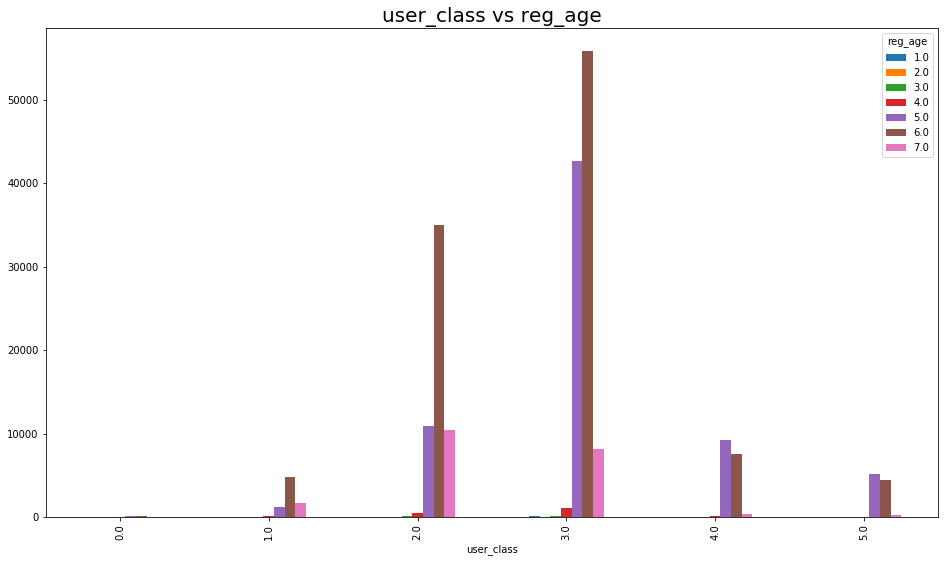

In [22]:
plt.rcParams['figure.figsize'] = (16, 9)
x = pd.crosstab(new_data['user_class'], new_data['reg_age'])
x.plot(kind = 'bar', stacked = False)
plt.title('user_class vs reg_age', fontweight = 30, fontsize = 20)
plt.show()

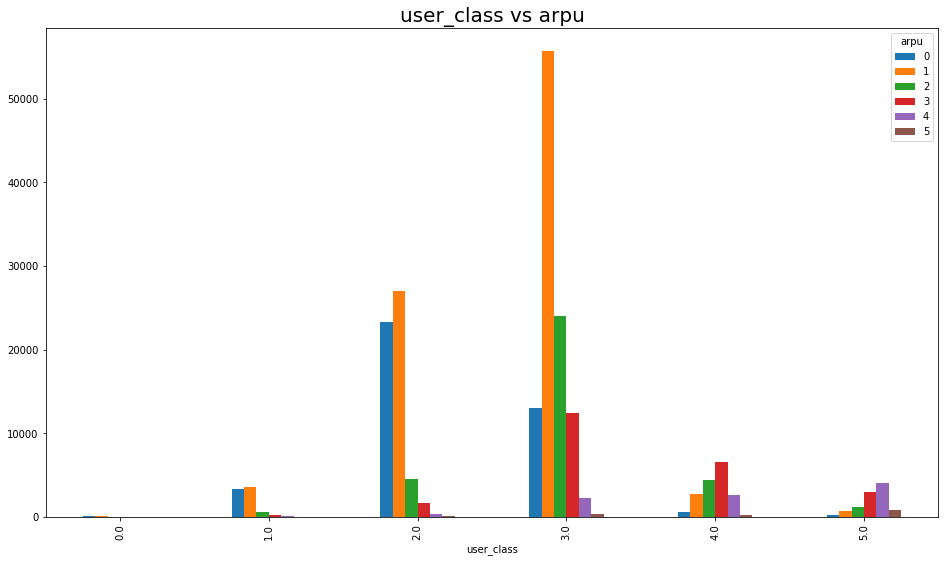

In [23]:
plt.rcParams['figure.figsize'] = (16, 9)
x = pd.crosstab(new_data['user_class'], new_data['arpu'])
x.plot(kind = 'bar', stacked = False)
plt.title('user_class vs arpu', fontweight = 30, fontsize = 20)
plt.show()

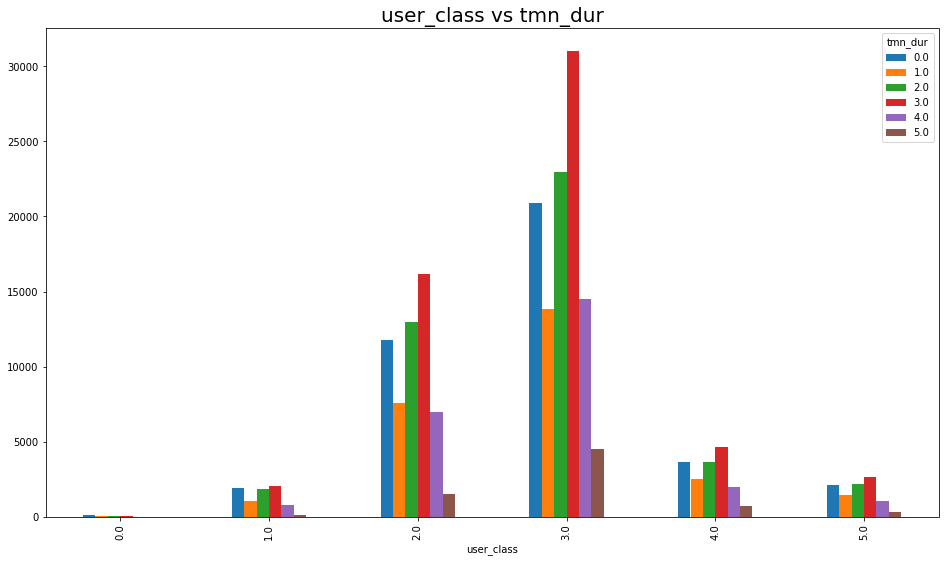

In [24]:
plt.rcParams['figure.figsize'] = (16, 9)
x = pd.crosstab(new_data['user_class'], new_data['tmn_dur'])
x.plot(kind = 'bar', stacked = False)
plt.title('user_class vs tmn_dur', fontweight = 30, fontsize = 20)
plt.show()

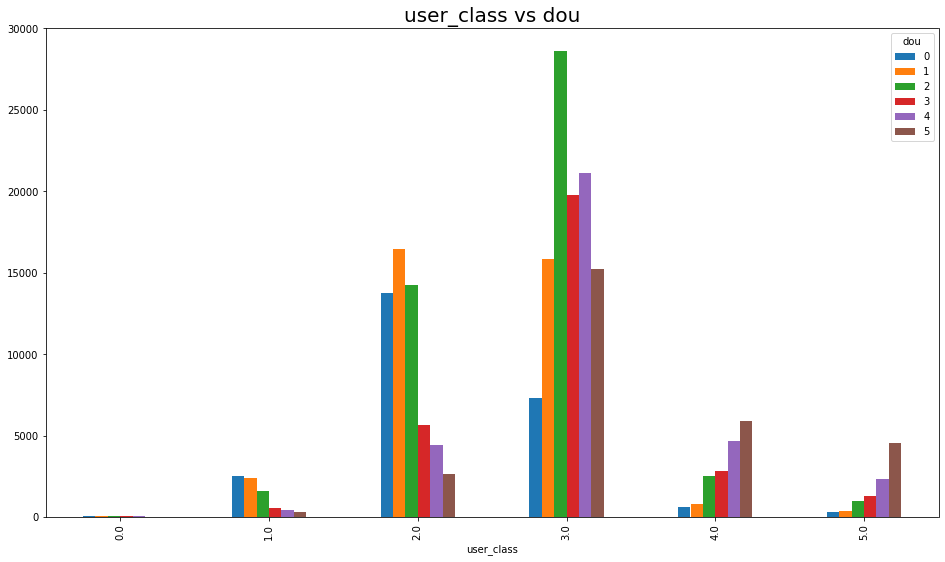

In [25]:
plt.rcParams['figure.figsize'] = (16, 9)
x = pd.crosstab(new_data['user_class'], new_data['dou'])
x.plot(kind = 'bar', stacked = False)
plt.title('user_class vs dou', fontweight = 30, fontsize = 20)
plt.show()

In [26]:
temp_df = new_data.groupby(['app_top1_code'], as_index = False)['reg_gender'].count()
temp_df = temp_df.sort_values(by = 'reg_gender', ascending = False)
temp_df.head(10)
temp_df = temp_df[:10]


In [27]:
temp_app_code = temp_df['app_top1_code']
temp_app = temp_app_code.apply(lambda x: app_list[x])

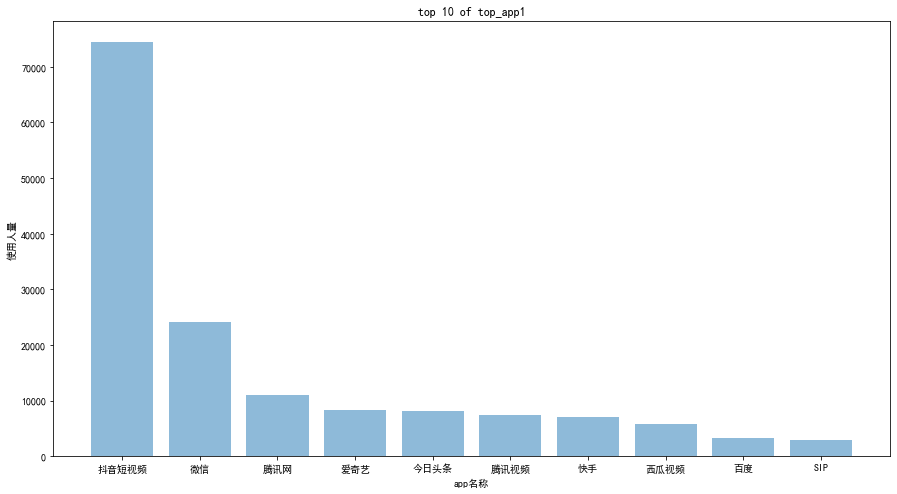

In [28]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(15, 8))
x = temp_app.to_list()
y = temp_df['reg_gender'].to_list()
plt.bar(x, y, align="center",label="top1_app",alpha=0.5)
plt.title('top 10 of top_app1')
plt.xlabel("app名称")
plt.ylabel("使用人量")
plt.show()

In [29]:
temp_df = new_data.groupby(['app_top2_code'], as_index = False)['reg_gender'].count()
temp_df = temp_df.sort_values(by = 'reg_gender', ascending = False)
temp_df.head(10)
temp_df = temp_df[:10]

temp_app_code2 = temp_df['app_top2_code']
temp_app2 = temp_app_code2.apply(lambda x: app_list[x])

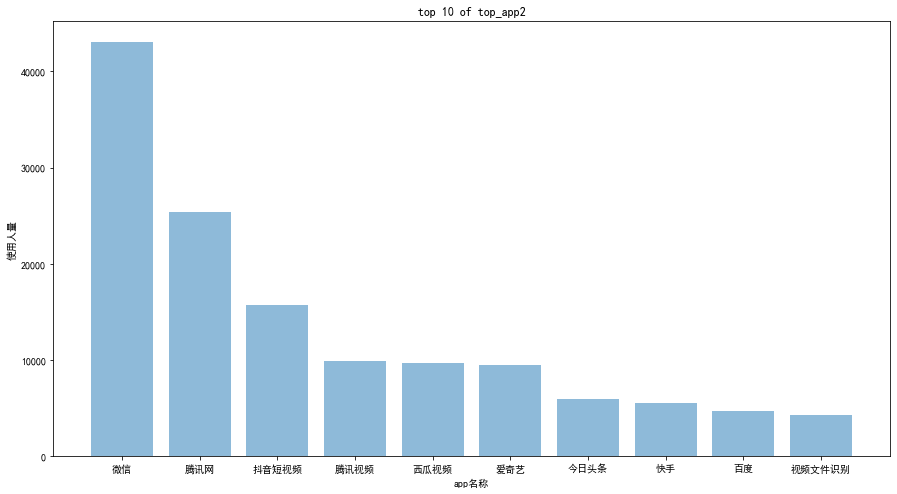

In [30]:
fig = plt.figure(figsize=(15, 8))
x = temp_app2.to_list()
y = temp_df['reg_gender'].to_list()
plt.bar(x, y, align="center",label="top1_app",alpha=0.5)
plt.title('top 10 of top_app2')
plt.xlabel("app名称")
plt.ylabel("使用人量")
plt.show()

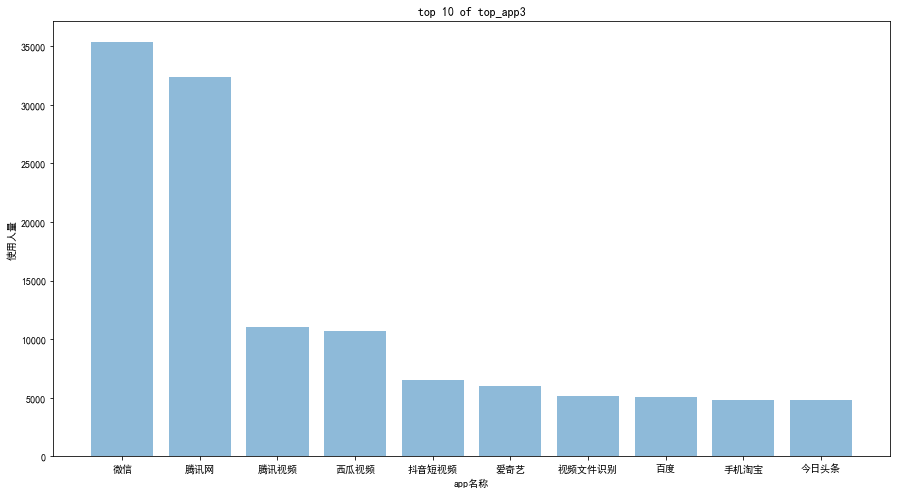

In [31]:
temp_df = new_data.groupby(['app_top3_code'], as_index = False)['reg_gender'].count()
temp_df = temp_df.sort_values(by = 'reg_gender', ascending = False)
temp_df.head(10)
temp_df = temp_df[:10]

temp_app_code3 = temp_df['app_top3_code']
temp_app3 = temp_app_code3.apply(lambda x: app_list[x])
fig = plt.figure(figsize=(15, 8))

x = temp_app3.to_list()
y = temp_df['reg_gender'].to_list()
plt.bar(x, y, align="center",label="top1_app",alpha=0.5)
plt.title('top 10 of top_app3')
plt.xlabel("app名称")
plt.ylabel("使用人量")
plt.show()

### 预测模型

In [43]:
new_data.head()

,reg_gender,reg_age,arpu,tmn_dur,user_online,user_class,dou,day_county_code,app_top1_code,app_top2_code,app_top3_code
0,0,6.0,2,3.0,5,2.0,1,59,5,980,927
1,0,6.0,2,0.0,5,3.0,2,98,316,345,1210
2,0,5.0,3,1.0,5,3.0,4,29,589,927,147
3,0,7.0,1,3.0,5,3.0,0,21,307,1186,345
4,0,7.0,2,0.0,5,3.0,1,8,345,980,927


In [44]:
y = new_data['user_class'].values
x = new_data.drop(['user_class', 'day_county_code', 'app_top1_code', 'app_top2_code','app_top3_code'], axis = 1).values
x.shape

(200000, 6)

In [45]:
y.shape

(200000,)

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [35]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 666)

In [36]:
train_x.shape

(160000, 10)

In [46]:
test_x.shape

(40000, 10)

In [47]:
train_y.shape

(160000,)

In [49]:
scaler = MinMaxScaler()

In [50]:
scaler_train_x = scaler.fit_transform(train_x)
scaler_test_x = scaler.fit(test_x)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [52]:
### 逻辑回归
logic = LogisticRegression(max_iter= 3000)
### KNN
knn = KNeighborsClassifier()
### 决策树
dt = DecisionTreeClassifier()
### 随机森林
rf = RandomForestClassifier(random_state=666)
### xgb
xgb = XGBClassifier(random_state = 666)

model_list = [logic, knn, dt, rf, xgb]
for model in model_list:
    print('\n')
    print(model)
    cv = cross_val_score(model, scaler_train_x, train_y, cv = 5)  ## 交差验证 分成5分
    print(cv)
    print(cv.mean())




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[0.6106875  0.6095     0.60553125 0.61084375 0.6103125 ]
0.609375


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[0.55225    0.5488125  0.54925    0.5529375  0.55446875]
0.55154375


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 